In [518]:
import pandas as pd

In [519]:
df=pd.read_csv(r"C:\Users\Suri\Downloads\churn_dataset.csv")

In [520]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [521]:
df.shape

(7043, 21)

In [522]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [523]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [524]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [525]:
df[df["TotalCharges"]==" "].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [526]:
indices=df[df["tenure"]== 0].index

In [527]:
df.drop(indices,inplace=True)

In [528]:
df.shape

(7032, 21)

In [529]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [530]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [531]:
df["SeniorCitizen"]=df["SeniorCitizen"].astype(object)

In [532]:
X=df.drop(columns="Churn")
y=df["Churn"]

In [533]:
X.shape

(7032, 20)

In [534]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [535]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(5274, 20) (5274,)
(1758, 20) (1758,)


In [536]:
from sklearn.preprocessing import StandardScaler

In [537]:
scaler=StandardScaler()

In [538]:
X_test_num=X_test.select_dtypes(include=["int64","float64"])

In [539]:
X_test_num.head()

,tenure,MonthlyCharges,TotalCharges
1778,72,24.75,1859.10
5036,16,85.35,1375.15
1106,63,97.45,6253.00
1665,9,76.85,663.55
927,13,81.15,952.30


In [540]:
X_train_num=X_train.select_dtypes(include=["int64","float64"])

In [541]:
X_train_num.shape

(5274, 3)

In [542]:
X_test_num.shape

(1758, 3)

In [543]:
import matplotlib.pyplot as plt
import seaborn as sns

In [544]:
X_train_num.columns[0]

'tenure'

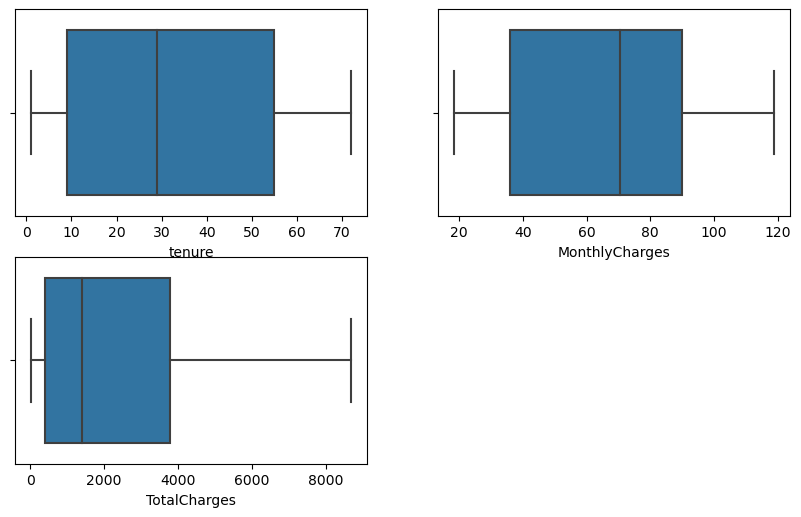

In [545]:
plt.figure(figsize=[10,22])
for i in range(len(X_train_num.columns)):
    plt.subplot(7,2,i+1)
    sns.boxplot(x=X_train_num.columns[i],data=X_train_num)

In [546]:
X_train_num=pd.DataFrame(scaler.fit_transform(X_train_num),columns=X_train_num.columns,index=X_train_num.index)

In [547]:
X_train_num.head(5)

,tenure,MonthlyCharges,TotalCharges
4533,1.577439,1.330385,2.303527
5074,0.681144,-1.510854,-0.601104
2693,1.618180,-1.515827,-0.385020
6095,-1.152188,-1.504224,-0.974927
4552,-0.948484,-1.477701,-0.939898


In [548]:
X_train_num.shape

(5274, 3)

In [549]:
X_test_num=pd.DataFrame(scaler.transform(X_test_num),columns=X_test_num.columns,index=X_test_num.index)

In [550]:
X_test_num.head()

,tenure,MonthlyCharges,TotalCharges
1778,1.618180,-1.335142,-0.190479
5036,-0.663299,0.673949,-0.402381
1106,1.251513,1.075105,1.733434
1665,-0.948484,0.392146,-0.713962
927,-0.785521,0.534705,-0.587530


In [551]:
X_test_num.shape

(1758, 3)

In [552]:
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [553]:
df["PhoneService"].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [554]:
df["MultipleLines"].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [555]:
df["PaperlessBilling"].value_counts()

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

In [556]:
X_train_cat=X_train.select_dtypes(include="object")

In [557]:
X_test_cat=X_test.select_dtypes(include="object")

In [558]:
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [559]:
X_train_cat_ohe=X_train_cat[["gender","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]]

In [560]:
X_test_cat_ohe=X_test_cat[["gender","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]]

In [561]:
from sklearn.preprocessing import OneHotEncoder

In [562]:
encoder=OneHotEncoder(drop="first",sparse=False)

In [563]:
X_train_cat_ohe=pd.DataFrame(encoder.fit_transform(X_train_cat_ohe),
                             columns=encoder.get_feature_names_out(X_train_cat_ohe.columns),
                            index=X_train_cat_ohe.index)

In [564]:
X_train_cat_ohe.head()

,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4533,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5074,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2693,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6095,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4552,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [565]:
X_test_cat_ohe=pd.DataFrame(encoder.transform(X_test_cat_ohe),
                             columns=encoder.get_feature_names_out(X_test_cat_ohe.columns),
                            index=X_test_cat_ohe.index)

In [566]:
X_test_cat_ohe.head()

,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1778,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
5036,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1106,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1665,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
927,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [567]:
X_train_cat_le=X_train_cat[["SeniorCitizen","Partner","Dependents","PhoneService"]]

In [568]:
X_test_cat_le=X_test_cat[["SeniorCitizen","Partner","Dependents","PhoneService"]]

In [569]:
X_train_cat_le["Partner"]=X_train_cat_le["Partner"].apply(lambda x:0 if x=="No" else 1)

C:\Users\Suri\AppData\Local\Temp\ipykernel_20584\2570574602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_le["Partner"]=X_train_cat_le["Partner"].apply(lambda x:0 if x=="No" else 1)


In [570]:
X_train_cat_le["Dependents"]=X_train_cat_le["Dependents"].apply(lambda x:0 if x=="No" else 1)

C:\Users\Suri\AppData\Local\Temp\ipykernel_20584\302905254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_le["Dependents"]=X_train_cat_le["Dependents"].apply(lambda x:0 if x=="No" else 1)


In [571]:
X_train_cat_le["PhoneService"]=X_train_cat_le["PhoneService"].apply(lambda x:0 if x=="No" else 1)

C:\Users\Suri\AppData\Local\Temp\ipykernel_20584\1925872375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_le["PhoneService"]=X_train_cat_le["PhoneService"].apply(lambda x:0 if x=="No" else 1)


In [572]:
X_train_cat_le

,SeniorCitizen,Partner,Dependents,PhoneService
4533,0,1,0,1
5074,0,0,1,1
2693,0,0,0,1
6095,0,0,0,1
4552,0,0,0,1
...,...,...,...,...
907,0,0,0,1
5200,0,1,1,1
3987,0,0,0,1
235,0,0,0,1


In [573]:
X_test_cat_le["Partner"]=X_test_cat_le["Partner"].apply(lambda x:0 if x=="No" else 1)
X_test_cat_le["PhoneService"]=X_test_cat_le["PhoneService"].apply(lambda x:0 if x=="No" else 1)


X_test_cat_le["Dependents"]=X_test_cat_le["Dependents"].apply(lambda x:0 if x=="No" else 1)

C:\Users\Suri\AppData\Local\Temp\ipykernel_20584\3969803435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_le["Partner"]=X_test_cat_le["Partner"].apply(lambda x:0 if x=="No" else 1)
C:\Users\Suri\AppData\Local\Temp\ipykernel_20584\3969803435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_le["PhoneService"]=X_test_cat_le["PhoneService"].apply(lambda x:0 if x=="No" else 1)
C:\Users\Suri\AppData\Local\Temp\ipykernel_20584\3969803435.py:5: SettingWithCopyWarning: 
A value is tryi

In [574]:
X_train_cat=pd.concat([X_train_cat_ohe,X_train_cat_le],axis=1)

In [575]:
X_train_cat

,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,Partner,Dependents,PhoneService
4533,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0,1,0,1
5074,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0,0,1,1
2693,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1
6095,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1
4552,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0,1
5200,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0,1,1,1
3987,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1
235,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1


In [576]:
X_test_cat=pd.concat([X_test_cat_ohe,X_test_cat_le],axis=1)

In [577]:
X_test_cat

,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,Partner,Dependents,PhoneService
1778,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0,1,1,1
5036,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1,1,0,1
1106,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1
1665,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1
927,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1
4358,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0,1,1,1
5847,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0,1
4080,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0,1,1,1


In [578]:
X_train_transformed=pd.concat([X_train_num,X_train_cat],axis=1)

In [579]:
X_test_transformed=pd.concat([X_test_num,X_test_cat],axis=1)

In [580]:
X_train_transformed

,tenure,MonthlyCharges,TotalCharges,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,Partner,Dependents,PhoneService
4533,1.577439,1.330385,2.303527,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0,1,0,1
5074,0.681144,-1.510854,-0.601104,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0,0,1,1
2693,1.618180,-1.515827,-0.385020,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1
6095,-1.152188,-1.504224,-0.974927,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1
4552,-0.948484,-1.477701,-0.939898,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,-0.541077,0.010883,-0.465127,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0,1
5200,1.536698,1.375142,2.234345,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0,1,1,1
3987,-0.867003,0.380542,-0.637600,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1
235,-1.233669,-0.352146,-0.954544,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1


In [581]:
X_test_transformed

,tenure,MonthlyCharges,TotalCharges,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,Partner,Dependents,PhoneService
1778,1.618180,-1.335142,-0.190479,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0,1,1,1
5036,-0.663299,0.673949,-0.402381,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1,1,0,1
1106,1.251513,1.075105,1.733434,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1
1665,-0.948484,0.392146,-0.713962,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1
927,-0.785521,0.534705,-0.587530,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,-0.907743,-0.668760,-0.813860,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1
4358,-0.785521,-0.009009,-0.620348,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0,1,1,1
5847,1.210773,0.960726,1.516343,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0,1
4080,-0.133670,-1.290385,-0.701264,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0,1,1,1


In [582]:
y_train.shape

(5274,)

In [583]:
y_test.shape

(1758,)

# Logistic Regression

In [584]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

LogisticRegression()

In [585]:
y_test_pred=regressor.predict(X_test_transformed)

In [586]:
from sklearn.metrics import accuracy_score

In [587]:
accuracy_score(y_test,y_test_pred)

0.7974971558589306

# KNN Classifier

In [588]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)
accuracy_score(y_test, y_test_pred)

C:\Users\Suri\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7633674630261661

# Decision Tree Classifier

In [589]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

accuracy_score(y_test, y_test_pred)

0.7201365187713311

# Random Forest Classifier

In [591]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

accuracy_score(y_test, y_test_pred)

0.7901023890784983

# Support Vector Machine

In [592]:
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(X_train_transformed,y_train)

y_test_pred=classifier.predict(X_test_transformed)
accuracy_score(y_test, y_test_pred)

0.7997724687144482